In [1]:
%reset -f
import pandas as pd
import numpy as np
from wavhandler import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
data = Dataset('Leafminers')
data.read(data=data.target_classes[1], setting='psd_dB', labels='nr')
Xbk = data.X.copy()

Data: Cichorii_v2.
Read 3900 filenames in 0.05 seconds.
Loaded data into matrix in 1.26 seconds.


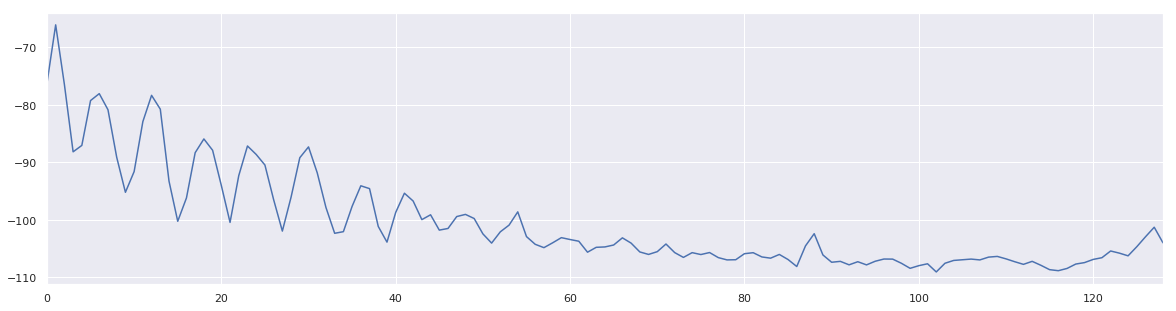

In [3]:
data.X.iloc[np.random.randint(0,3900)].plot(figsize=(20,5))

Explained Variance with 3 components: 0.87


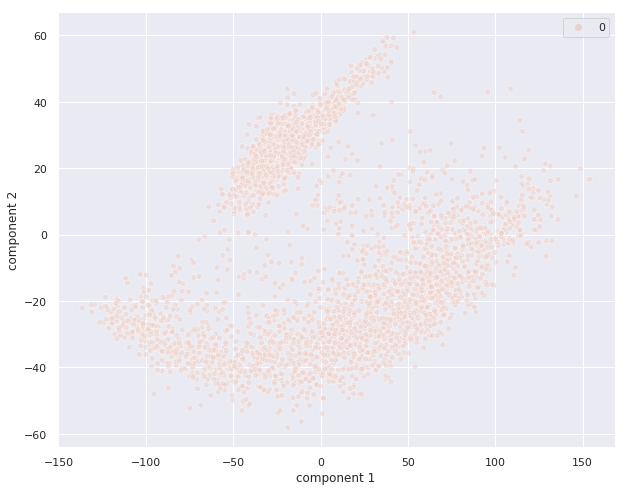

In [4]:
perform_analysis(data.X, data.y, setting='pca')

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data.X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Explained Variance with 3 components: 0.87


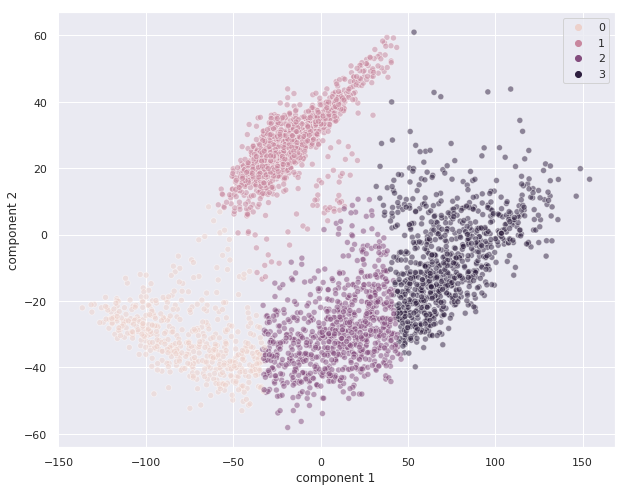

In [14]:
perform_analysis(data.X, kmeans.labels_)

In [7]:
df = pd.DataFrame()
df['feat'] = Xbk.apply(lambda x: x.iloc[10:50].var(), axis=1)
df['feat'].sort_values(ascending=False).head()

2921    103.689198
3448    102.849172
1444    100.481505
267      97.667426
2108     96.082641
Name: feat, dtype: float64

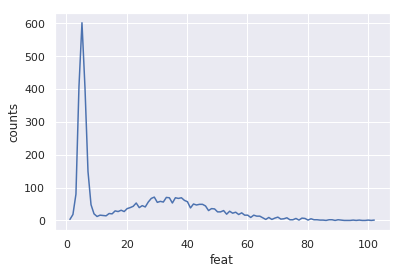

In [8]:
sub = pd.DataFrame()
sub['feat'] = df['feat']
np_hist(sub, 'feat', res=1) # sub[sub.feat>5]

1961
3900


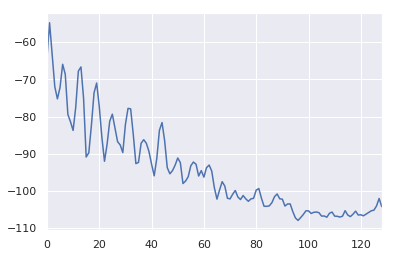

In [9]:
inds = df[(df['feat']>20)].index.values
sub = data.X.loc[inds]
# sub = d_raw.X.loc[inds]
sub.iloc[np.random.randint(0,sub.shape[0])].plot()
print(sub.shape[0])
print(data.X.shape[0])

Explained Variance with 3 components: 0.87


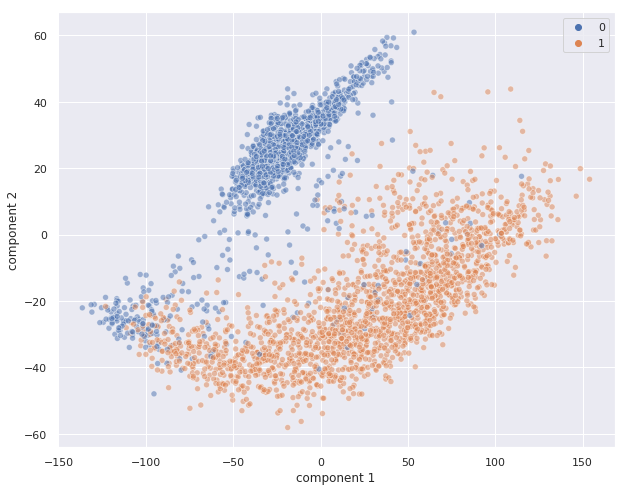

In [10]:
new_y = data.y
new_y.loc[inds] = 1
perform_analysis(Xbk, new_y)

In [17]:
pd.Series(kmeans.labels_).value_counts()

1    1727
3     854
2     814
0     505
dtype: int64